# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project i'm going to analyze the TMDB movie dataset and ivestigate it. with focusing on the features that makes the movies profitable and engaging.


### Question(s) for Analysis
My analysis will be about the profit of the movies and which features affect the profit of the movies
<ul>
<li><a href="#Q1">Q1 - What are the most profitable movies</a></li>
<li><a href="#Q2">Q2 - What is the correlation between the duration and the profit of the movie</a></li>
<li><a href="#Q3">Q3 - What are the studios that made these movies</a></li>
<li><a href="#Q4">Q4 - Who were the directors</a></li>
<li><a href="#Q5">Q5 - What is the top 10 genres in these movies</a></li>



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [42]:
movie_df = pd.read_csv('tmdb_movies.csv')


In [43]:
movie_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [44]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
# Checking if the id column has destinct values or not
sum(movie_df.id.duplicated())


1

##### Checking if the rows with missing values within the independent features(genre, runtime, studios, director), affects the dependent features (revenue and budget)


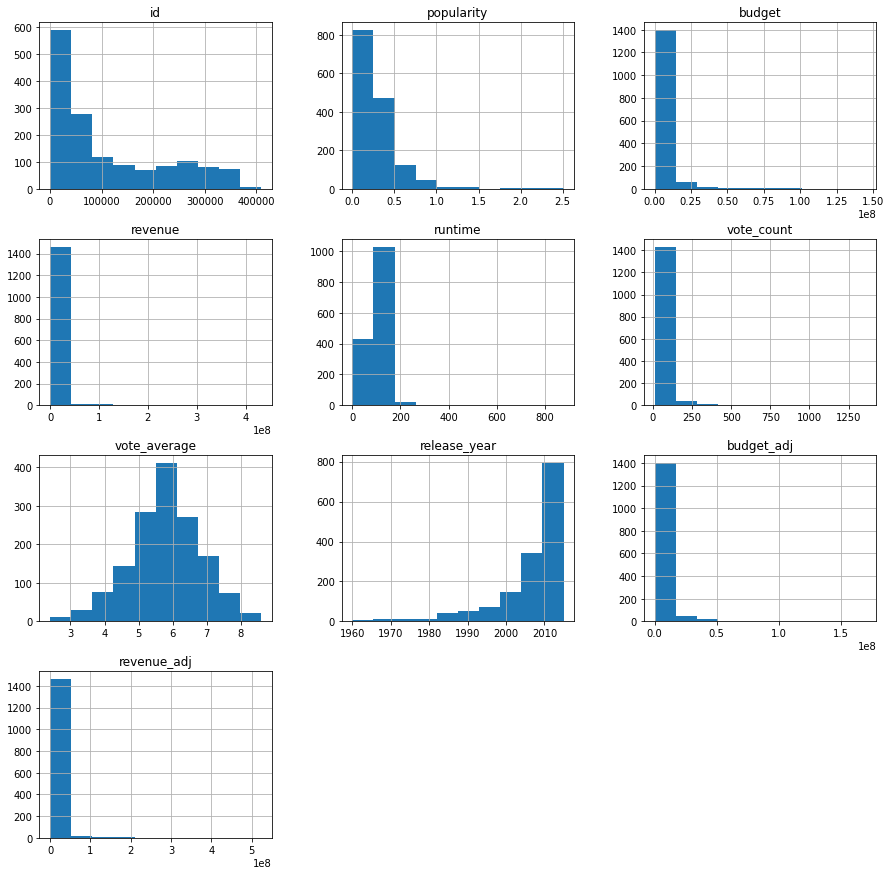

In [46]:

movie_df[movie_df.keywords.isnull()].hist(figsize=(15,15));


##### The missing values in keywords doesn't affect the outcome of the analysis

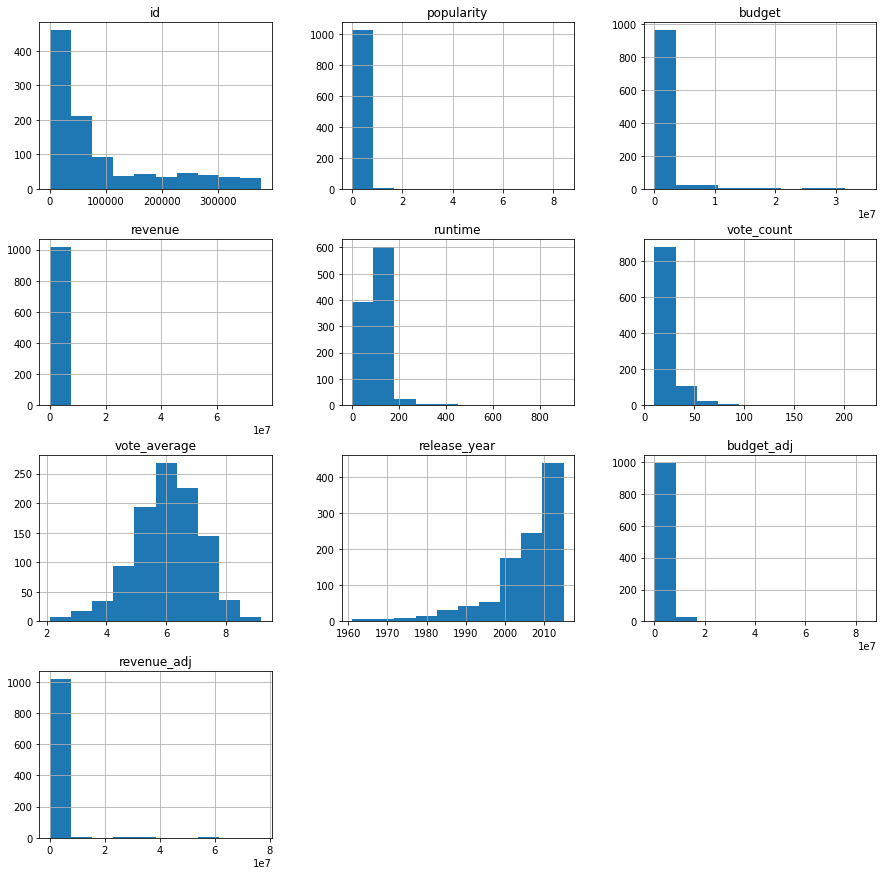

In [47]:
movie_df[movie_df.production_companies.isnull()].hist(figsize=(15,15));
#The missing values in Production Companies doesn't affect the outcome of the analysis

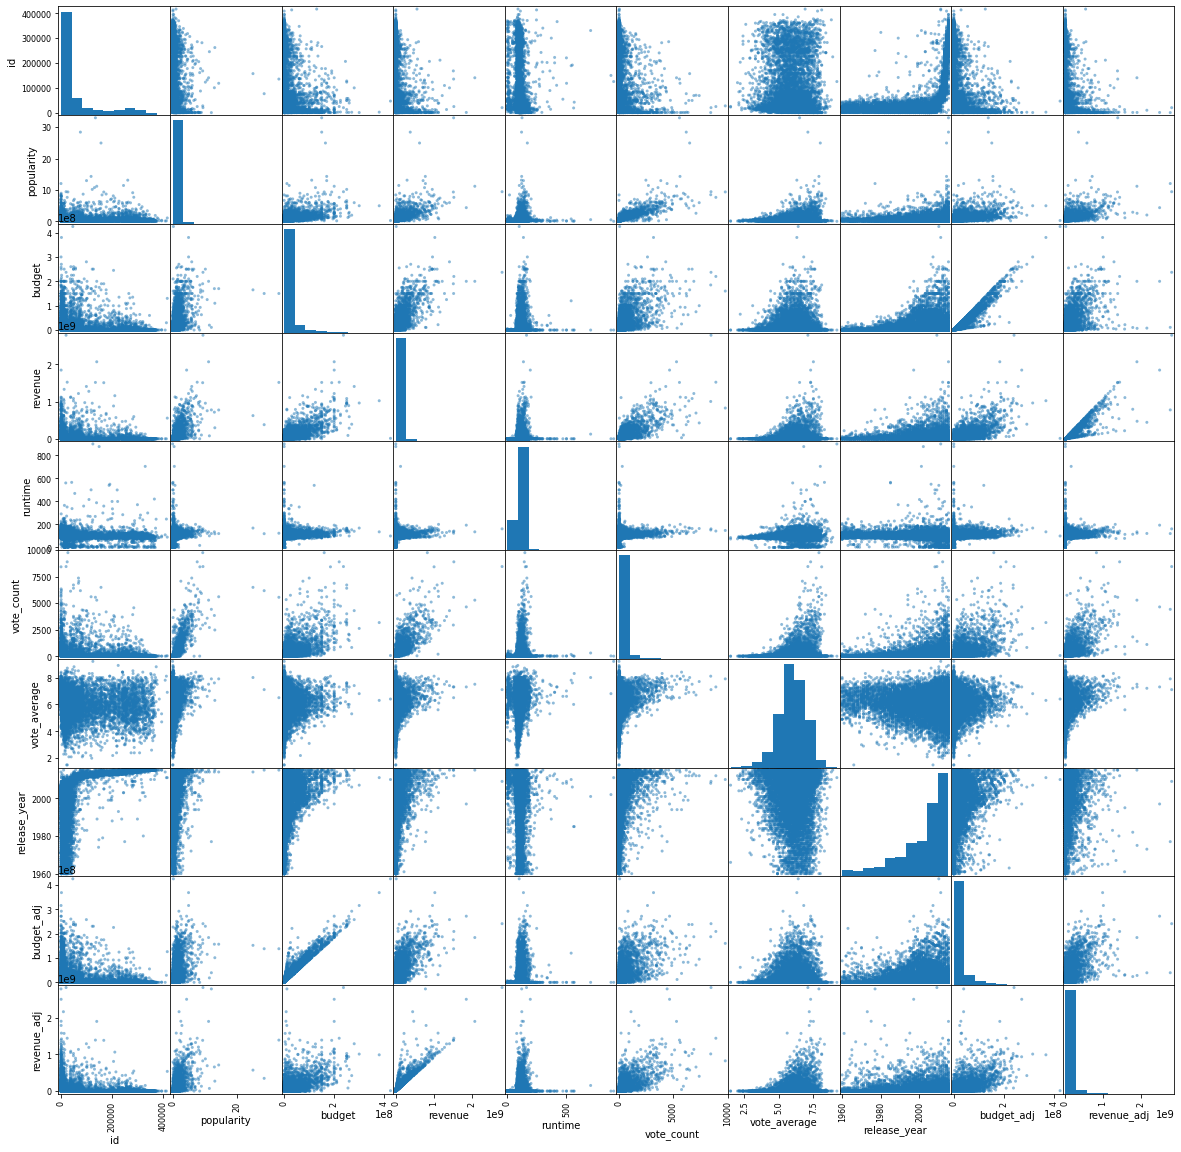

In [48]:
#plotting correlation matrix of the features
pd.plotting.scatter_matrix(movie_df, figsize= (20,20));

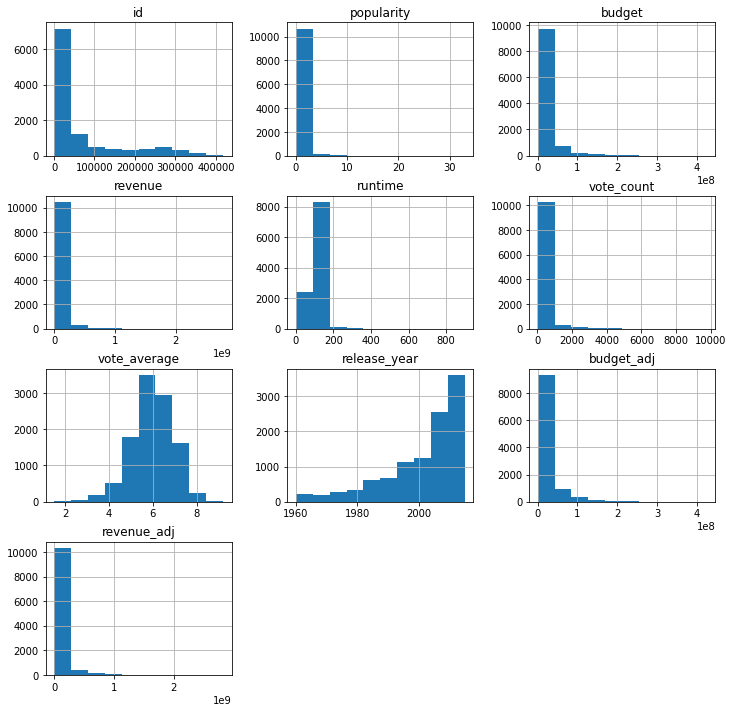

In [49]:
# inspecting the distribution of the different attributes of the data set
movie_df.hist(figsize=(12,12));

##### The data set has alot of zero values


### Data Cleaning
After inspecting the data and it's features the following needs to be done :<br>
 
 - Drop columns that we don't need on our analysis <br>
 - delete duplicats<br>
 - delete Nulls <br>
 - convert the release_date to date type <br>
 - Create profit column which is the difference between the revenue and the budget.
 - Not using the rows that has 0 budget or 0 revenue cause it would mess up our analysis <br>
 - drop the titles with release year after 2022 


In [50]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [51]:
# Dropping the not used columns
movie_df.drop(columns=['imdb_id', 'homepage','tagline','overview', 'budget_adj', 'revenue_adj'], inplace= True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(2), int6

In [52]:
#Deleting Duplicates
movie_df.drop_duplicates(inplace= True)
movie_df.duplicated().sum()

0

In [53]:
# Deleting null Values
movie_df.dropna(inplace= True)


In [54]:
# Changing the type of release date
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format="%m/%d/%y")


In [55]:
# After doing the analysis the warrior's way movie lost over 400 million dollars , so i double checked and i found out that budget had an extra zero !
movie_df.loc[2244,'budget'] = 42000000

In [56]:
# Creating 'Profit' Column
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']


In [57]:
# Creating a dataframe with non-zero values in budget and revenue
cleaned_df = movie_df.query('budget != 0 and revenue != 0')
cleaned_df.reset_index(drop=True, inplace=True)


In [58]:
# neglected movies with release year than 2022
cleaned_df = cleaned_df.query('release_date < 2022')

In [59]:
# function for making the plots of our analysis
def labeling(x_title, y_title, title, xticks_rotation = 0 ):
    """"
    Args:
    x_title (str): x axis title
    y_title (str): y axix title
    title (str): title of the chart
    xticks_rotation (float): degree of rotation for x axis labels 

    returns : none
    """
    plt.xlabel(x_title, fontsize = 20)
    plt.ylabel(y_title, fontsize = 20)
    plt.title(title, fontsize = 25)
    #rotatation of the x label data
    plt.xticks(rotation = xticks_rotation, fontsize = 12)
    plt.show()
    

<a id='eda'></a>
## Exploratory Data Analysis


### Q1 - What are the most and least profitable movies
<a id="Q1"></a>

In [60]:
# The first 50 most profitable movies
most_profit_df = cleaned_df.sort_values(by='profit', ascending = False).head(50)
# resetin the index of the new dataframe otherwise , every movie would keep the same index from the original dataframe
most_profit_df.reset_index(drop= True , inplace= True)
most_profit_df.sort_values(by = 'profit', ascending=False).head(2)



,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2544505847
1,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225


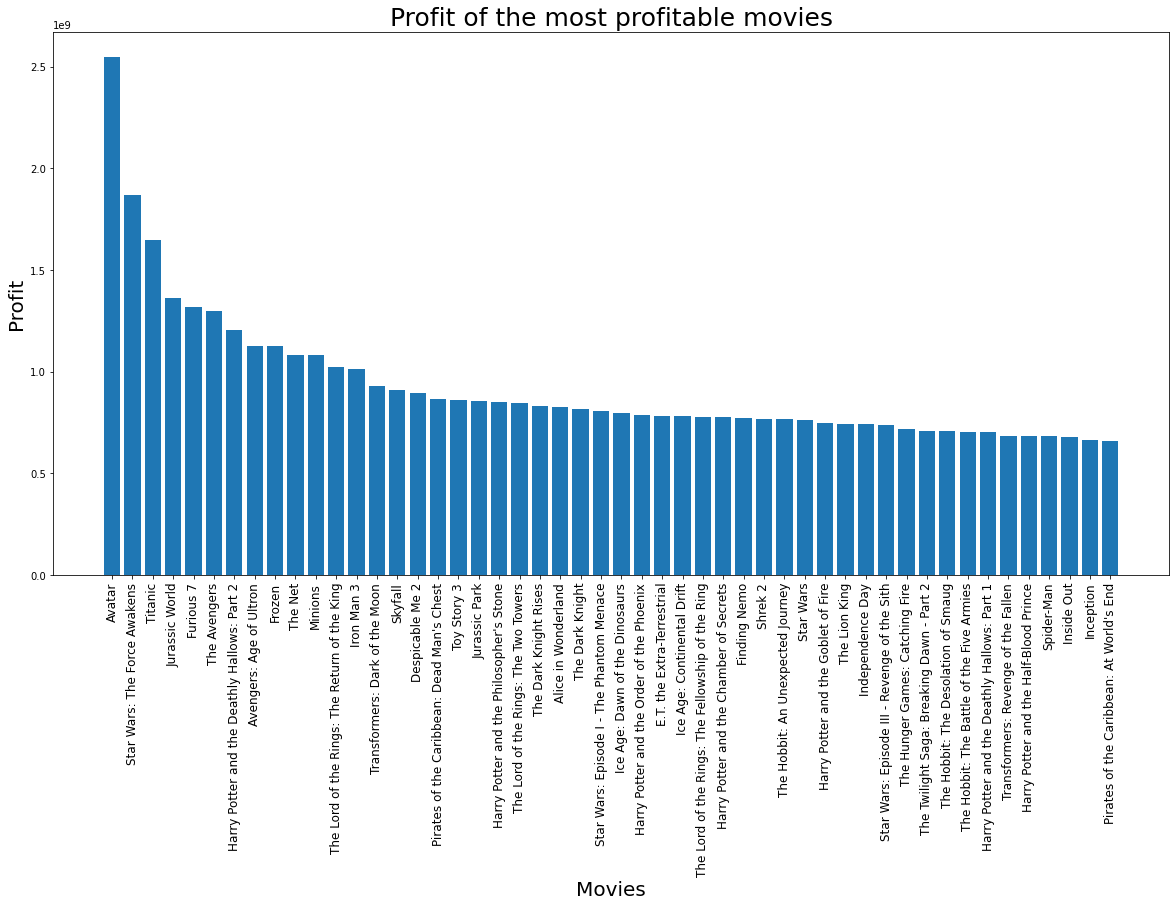

In [61]:
# plotting the movies by it's profit
plt.subplots(figsize = (20,10))
plt.bar(most_profit_df.original_title, most_profit_df.profit)
labeling('Movies', 'Profit','Profit of the most profitable movies',90)


##### Avatar is the most profitable movie with astonishing 2.5 billion dollars 

In [62]:
# How much of the overall profit did these 50 movies make
most_profit_df.shape[0] / cleaned_df.shape[0] * 100 , (most_profit_df.profit.sum() / cleaned_df.profit.sum()) *100

(1.3846579894765993, 17.307298484833982)

##### These 50 movies are only 1.3% of the total movies and yet they made 17% of the total profit !

In [63]:
#finding the least profitable movies

least_profit_df = cleaned_df.sort_values(by='profit', ascending = True).head(50)
# resetin the index of the new dataframe otherwise , every movie would keep the same index from the original dataframe
least_profit_df.reset_index(drop= True , inplace= True)
least_profit_df.head(2)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,57201,1.21451,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,texas|horse|survivor|texas ranger|partner,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,-165710090
1,10733,0.94856,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,texas|officer|uprising|alamo|mexican,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,-119180039


In [64]:
#Percentage of the movies which lost money and didn't make any profit
loss_movie_perce = cleaned_df.query('profit < 0').shape[0] / cleaned_df.shape[0] * 100

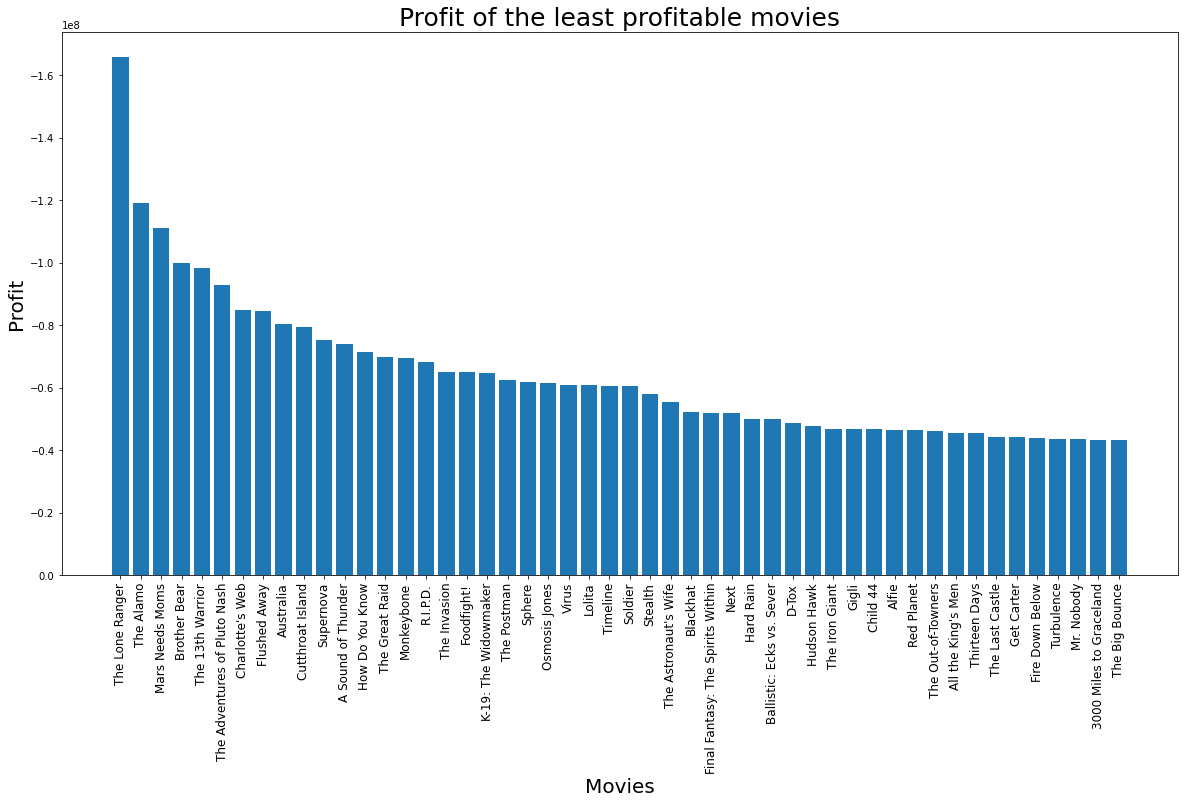

In [65]:
# plot to see the least profitable
plt.subplots(figsize = (20,10))
plt.bar(least_profit_df.original_title, least_profit_df.profit)
ax = plt.gca()
ax.invert_yaxis()
labeling('Movies', 'Profit','Profit of the least profitable movies',90)



##### The 50 least profitable movies didn't make any profit, they lost money!.  

### Q2 - What is the correlation between the duration and the profit of the movie
<a id="Q2"></a>


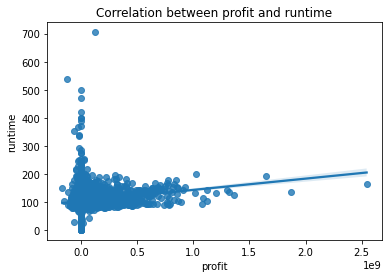

In [66]:
#plot using seaborn library between runtime and profit
sns.regplot(x=movie_df["profit"], y=movie_df["runtime"]).set_title('Correlation between profit and runtime');

#### Most of movies regardless of the profit are between somewhat between 90 min to 130 min so, there is no strong correlation between runtime and profit

### Q3 - What are the studios that made these movies
<a id="#Q3"></a>

In [67]:
cleaned_df.production_companies.head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

In [68]:
#splittin each studio name by itself
#using str.get_dummies() splits Each string in Series by sep and returned as a DataFrame of dummy/indicator variables
studios = most_profit_df.production_companies.str.get_dummies(sep = '|')
studios.head(2)

,1492 Pictures,3Foot7,Amblin Entertainment,Bad Robot,Blue Sky Studios,Centropolis Entertainment,Color Force,Columbia Pictures,Cool Music,DC Comics,...,Twentieth Century Fox Film Corporation,Universal Pictures,Universal Studios,Walt Disney Animation Studios,Walt Disney Feature Animation,Walt Disney Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,WingNut Films,"Zanuck Company, The"
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Summing the occurence for each studio and stopping at production companies who made 2 
studios_count = studios.sum().sort_values(ascending = False).head(20)
studios_count.head(3)

Warner Bros.            10
Walt Disney Pictures     8
Heyday Films             7
dtype: int64

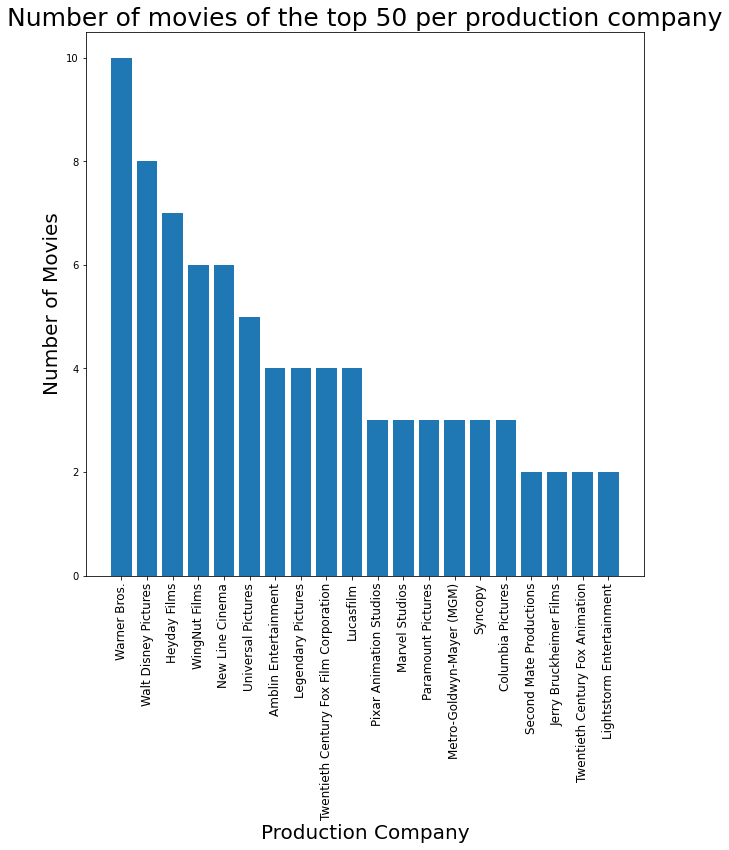

In [70]:
plt.subplots(figsize = (10,10))
plt.bar(studios_count.index, studios_count)
labeling('Production Company', 'Number of Movies','Number of movies of the top 50 per production company',90)

##### Q4 - who are the directors who made most profitable movies
<a id="#Q4"></a>

In [71]:
#Getting the first 20 directos who made the most profit on overage
directors_most_profit = most_profit_df.groupby('director')['profit'].mean().sort_values(ascending=False).head(30)
directors_most_profit.head()


director
James Cameron      2.094770e+09
J.J. Abrams        1.868178e+09
Colin Trevorrow    1.363529e+09
James Wan          1.316249e+09
Joss Whedon        1.212297e+09
Name: profit, dtype: float64

In [72]:
most_profit_df.groupby('director')['profit'].sum().sort_values(ascending=False).head(3)

director
Peter Jackson    4831068099
James Cameron    4189540035
David Yates      3379295625
Name: profit, dtype: int64

In [73]:
most_profit_df.director.value_counts().head()

Peter Jackson        6
David Yates          4
George Lucas         3
Christopher Nolan    3
James Cameron        2
Name: director, dtype: int64

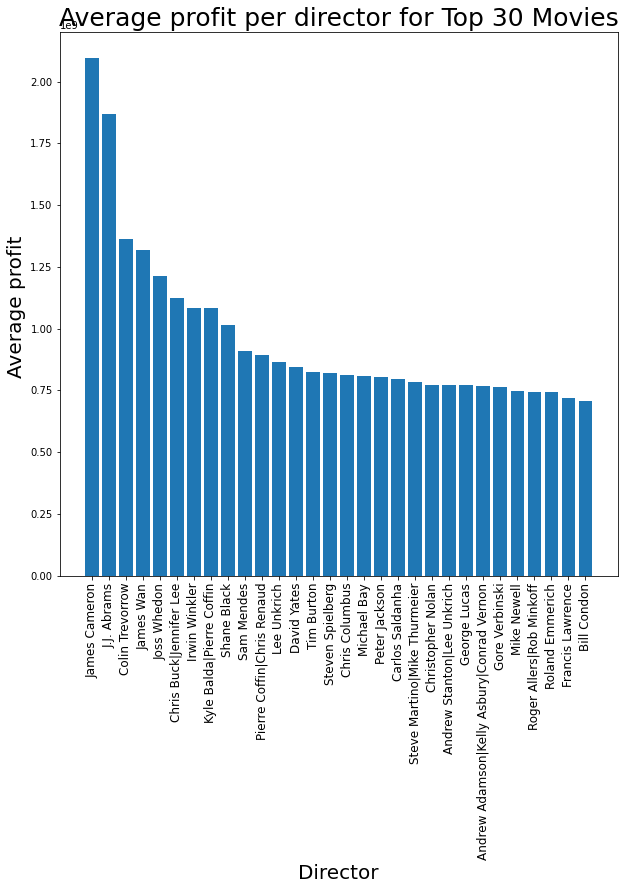

In [74]:
#finding the total profit
plt.subplots(figsize = (10,10))
plt.bar(directors_most_profit.index, directors_most_profit)
labeling('Director', 'Average profit ','Average profit per director for Top 30 Movies',90)


##### On average james Cameron made the most profitable movies, Avatar 1st and Titanic 3rd

#### Q5 - What is the top 10 genres in these movies
<a id="#Q5"></a>

In [75]:
most_profit_df.genres.head()

0     Action|Adventure|Fantasy|Science Fiction
1     Action|Adventure|Science Fiction|Fantasy
2                       Drama|Romance|Thriller
3    Action|Adventure|Science Fiction|Thriller
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [76]:
#splittin each genre alone
#using str.get_dummies() splits Each string in Series by sep and returned as a DataFrame of dummy/indicator variables
genre = most_profit_df.genres.str.get_dummies(sep = '|')
genre.head()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Science Fiction,Thriller
0,1,1,0,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,0,0,0,0,0,0,0,0,1,1
4,1,0,0,0,1,0,0,0,0,0,0,1


In [77]:
genre_count = genre.sum().sort_values(ascending = False)
genre_count

Adventure          39
Action             26
Fantasy            22
Family             19
Science Fiction    16
Animation          10
Thriller            9
Comedy              7
Drama               6
Crime               4
Mystery             3
Romance             2
dtype: int64

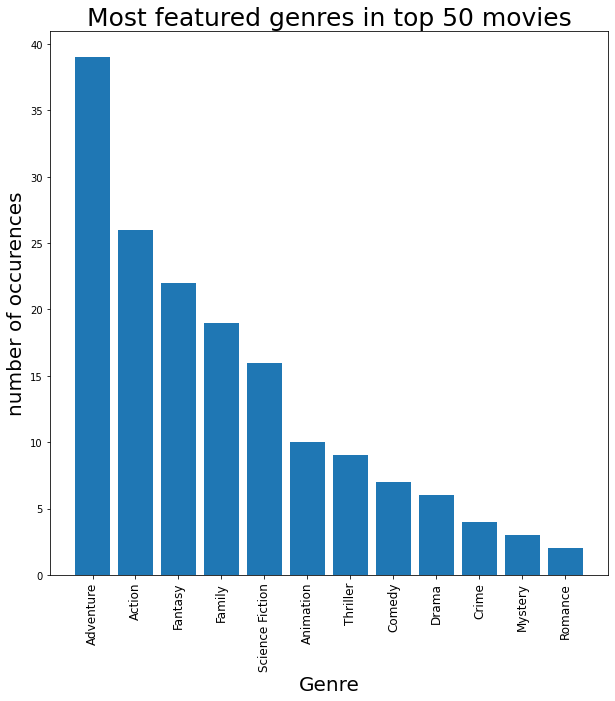

In [78]:
plt.subplots(figsize = (10,10))
plt.bar(genre_count.index, genre_count)
labeling('Genre', 'number of occurences','Most featured genres in top 50 movies',90)


#### Out of the 50 top movies 39 were classified as adventure while only 2 were romance

<a id='conclusions'></a>
## Conclusions
Our analysis was done on the 50 most profitable movies

- The top 50 most profitable movies had 17 % of the overall profits, with avatar earning alone 2.54 Billion dollars.
- 27% of the movies lost money and didn't make profit, and "The lone ranger" lost the most at 165 million dollars.
- There was no correlation between the duration of the movie and it's profit.
- Warner Bros. production company co-produced 10 out of the top 50 movies. 
- James Cameron directed 2 movies the first one was 'Avatar' the most profitable and the second was 'titanic' the third most profitable so, on Average he was the director who made the most profits.
- The director Peter Jackson directed 6 movies profiting 4.8 billion dollars so he would have topped my list but james cameron only directed two profiting 4.1 billion.
- Adventure movies are almost 80% of the top 50 , while romance movies were 4% .

- At last, if you wanted to make a blockbuster movie, bring James cameron as the director, make warner bros produce it, set the main genre to be Adventure.

>

### Limitations
- one of the biggest limitations i had is almost 50% of the movies had either 0 budget or 0 revenue so, i had to neglect half of the dataset ! 

